<a href="https://colab.research.google.com/github/mariaclaraseixa/palmerpenguins/blob/main/Palmer_Penguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prof, fiz pip install de palmerpenguin... mas acho que da pra baixar aqui https://gist.github.com/slopp/ce3b90b9168f2f921784de84fa445651


Caso não dê, é bem fácil achar esses dataset do palmer penguin. Também tenho os dois arquivos, posso te mandar se você quiser. Eu ia usar o do iris porém vi que você ja usou em um dos materiais da aula e decidi inovar um pouco, espero que goste. Não tive tanto tempo e por isso não ficou tão elaborado, e a acurácia não deu um valor tão alto. Mais pra frente tento melhorar esse projeto.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np

ModuleNotFoundError: No module named 'palmerpenguins'

In [2]:
pip install palmerpenguins

In [3]:
from palmerpenguins import load_penguins

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
penguins = load_penguins()

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [8]:
penguins.tail(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [9]:
penguins.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.0,2009.0


In [10]:
categorical_col = penguins.select_dtypes(include=['object']).columns
numerical_col = penguins.select_dtypes(include=['float64']).columns

In [11]:
print(penguins.species.unique())
print(penguins.island.unique())
print(penguins.sex.unique())

['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']
['male' 'female' nan]


In [12]:
k = 0
for i in penguins['sex']:
    if i == '.':
        k += 1

print(k)

filtered_data = penguins[penguins['sex'] != '.']

0


In [13]:
def PlotHistogram(penguins, variable):
    plt.figure()
    plt.hist(penguins[variable], bins=100)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Species" .format(variable))
    plt.show()

def PlotBar(penguins, variable, n=5):
    data_ = penguins[variable]
    data_counts = data_.value_counts()
    data_counts = data_counts[:n]

    plt.figure()
    plt.bar(data_counts.index, data_counts)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("island" .format(variable))
    plt.show()

def BoxPlotMethod(data, variable):
    plt.figure()
    sns.boxplot(x = variable, data=data)
    plt.show()

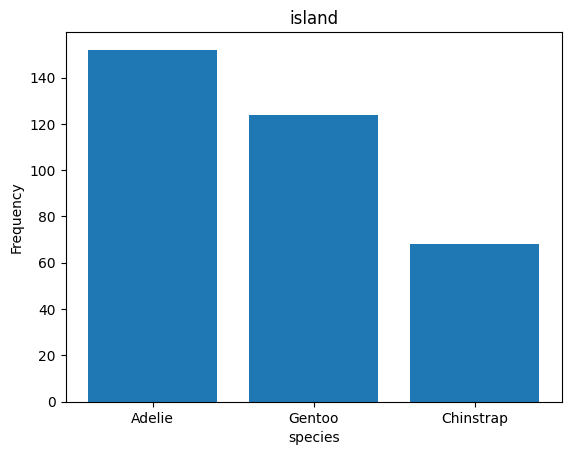

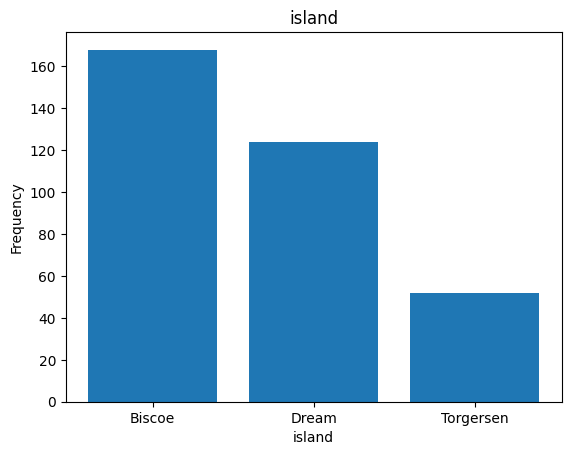

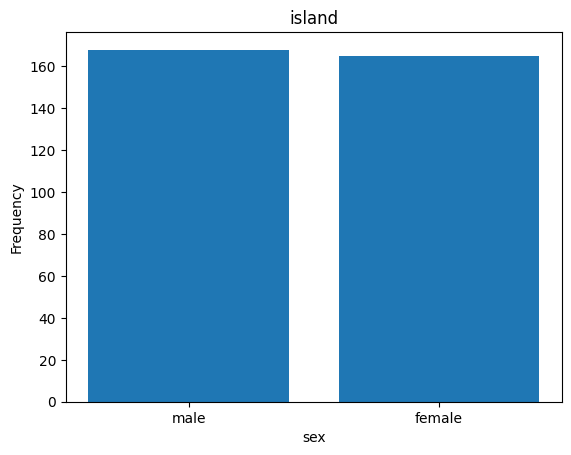

In [14]:
for i in categorical_col:
    PlotBar(filtered_data, i)

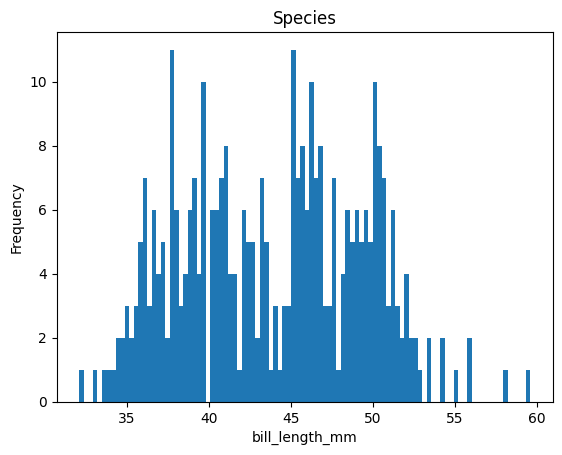

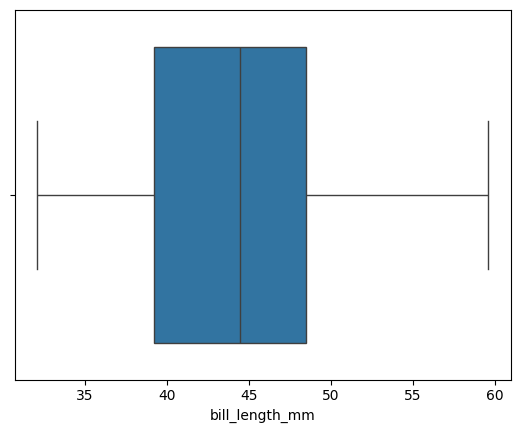

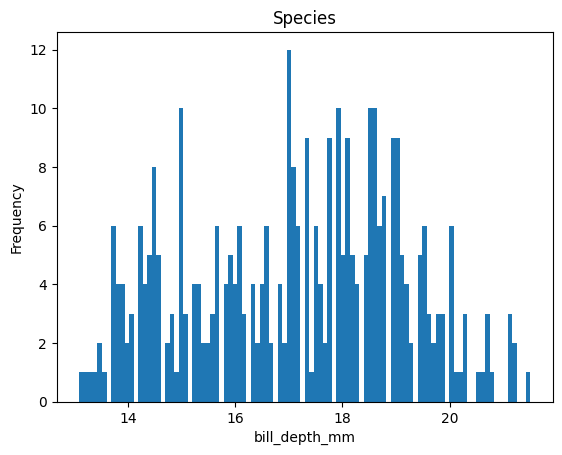

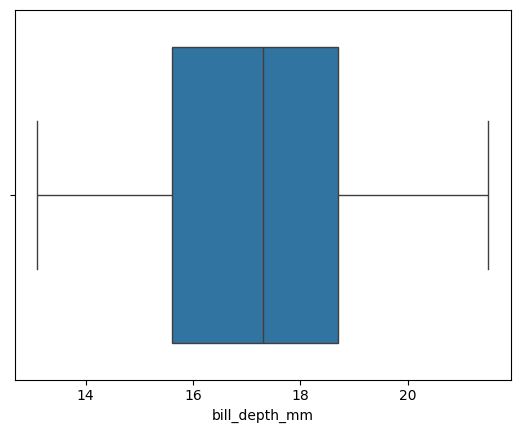

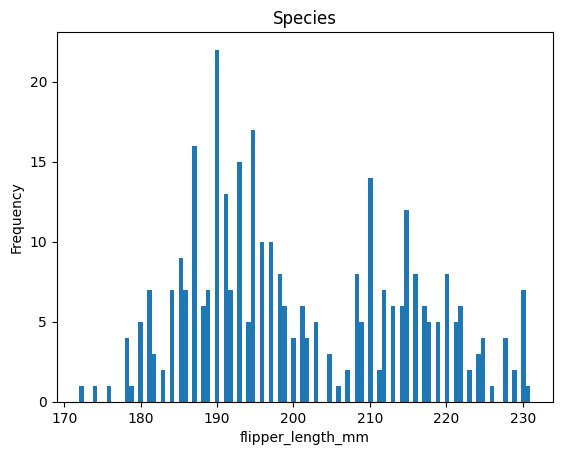

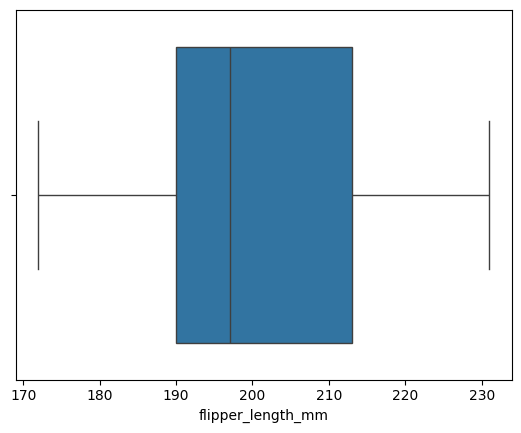

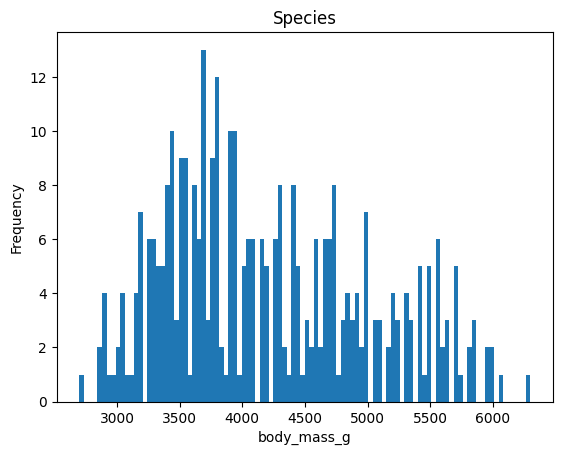

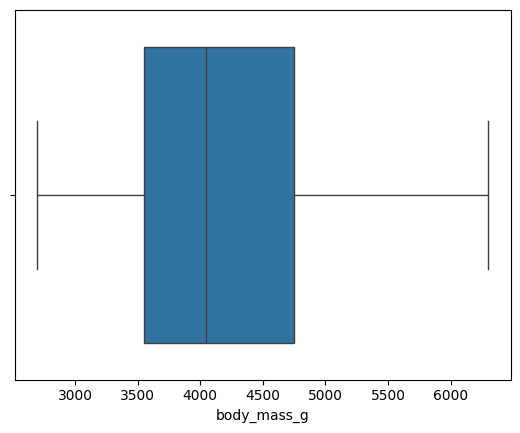

In [15]:
for i in numerical_col:
    PlotHistogram(filtered_data, i)
    BoxPlotMethod(filtered_data, i)

In [16]:
filtered_data.iloc[:,2:6].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


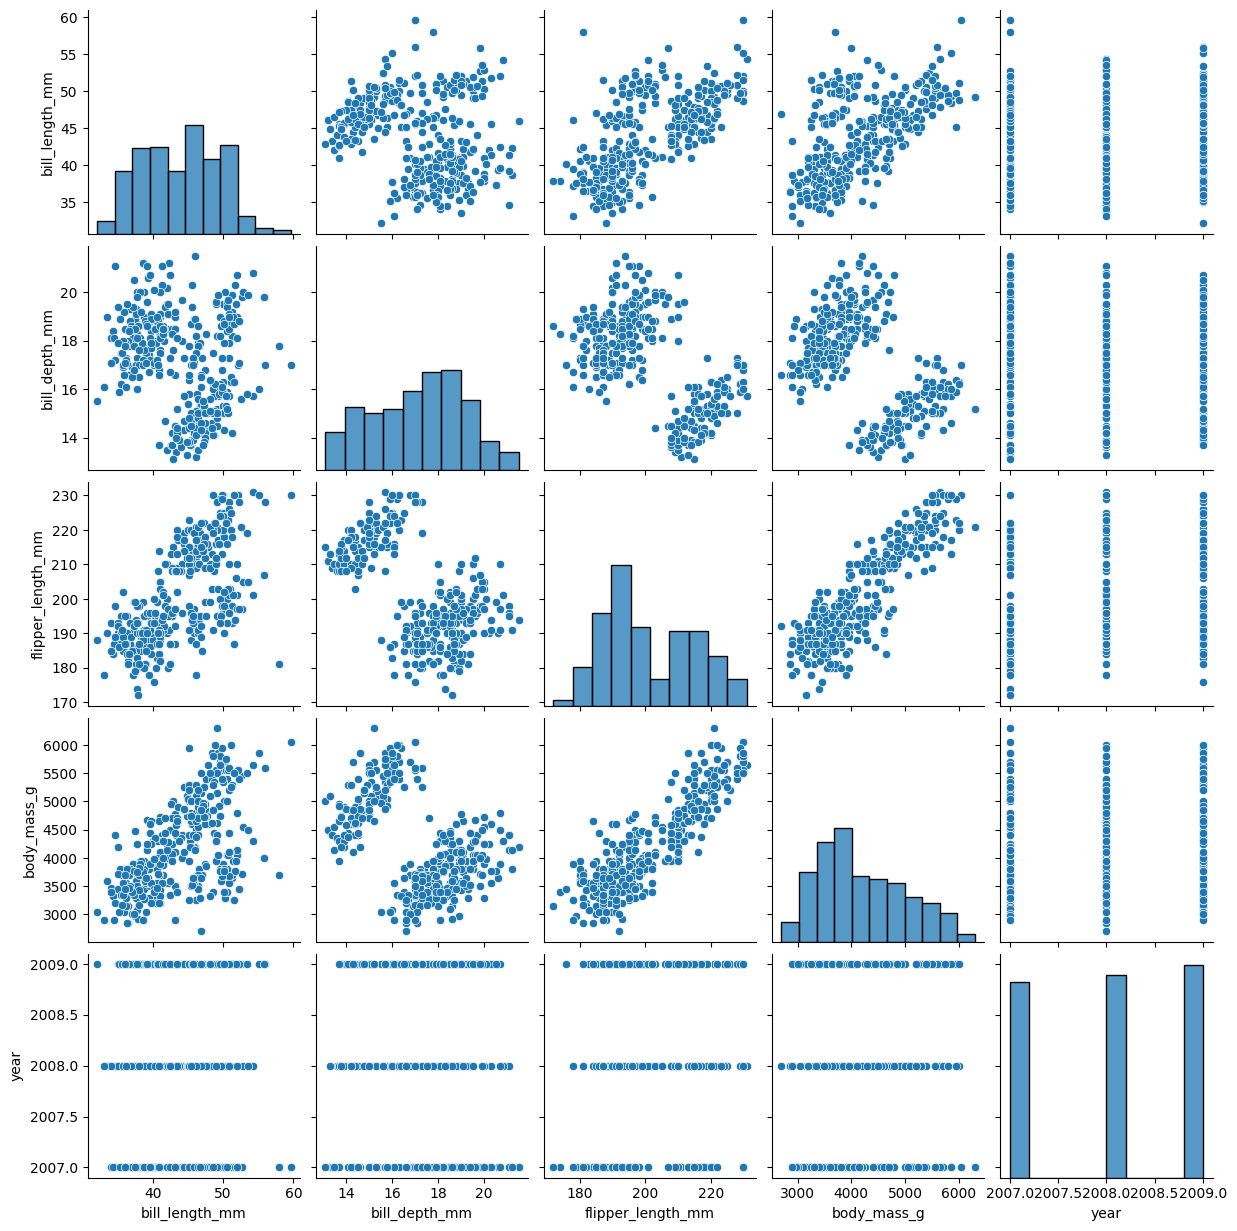

In [17]:
sns.pairplot(data=filtered_data)

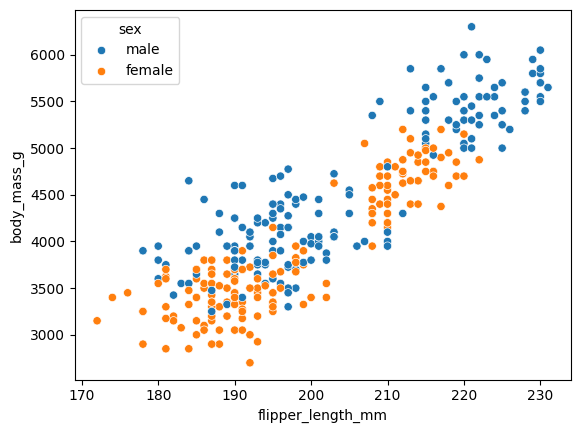

In [18]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='sex', data=filtered_data);

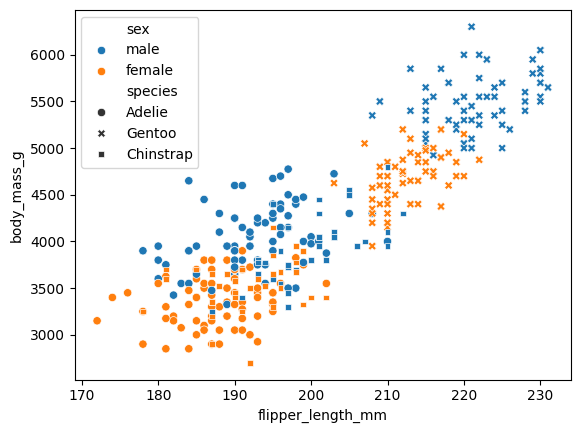

In [19]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='sex', style='species', data=filtered_data);

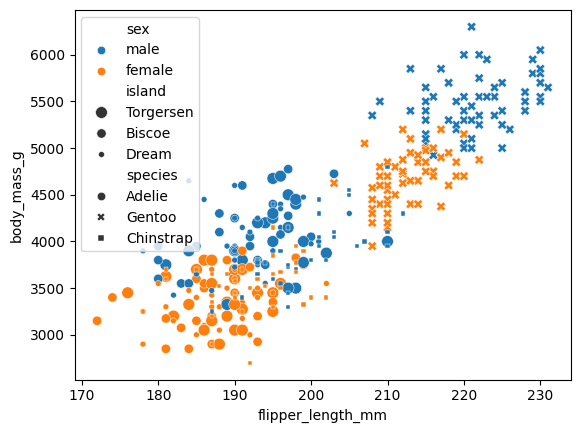

In [20]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='sex', style='species', size='island', data=filtered_data);

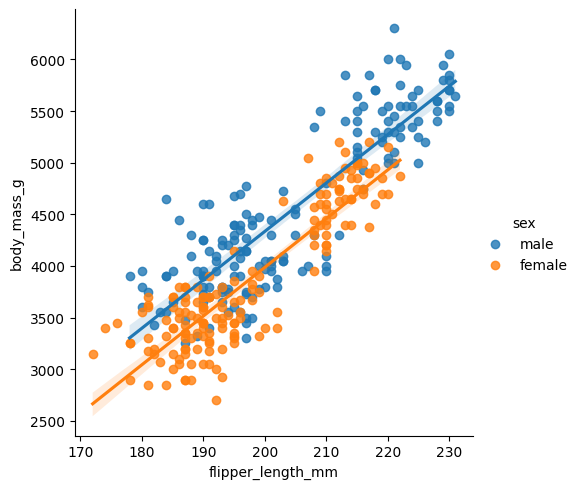

In [21]:
sns.lmplot(x='flipper_length_mm', y='body_mass_g', hue='sex', data=filtered_data)

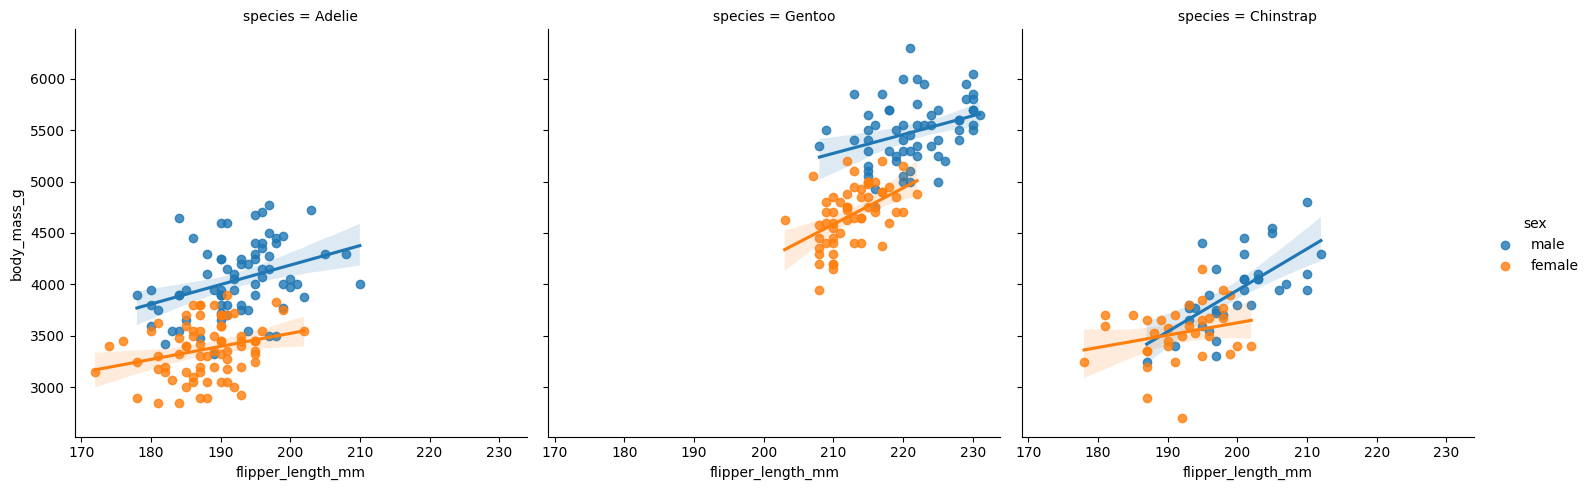

In [22]:
sns.lmplot(x='flipper_length_mm', y='body_mass_g', hue='sex', col='species', data=filtered_data)

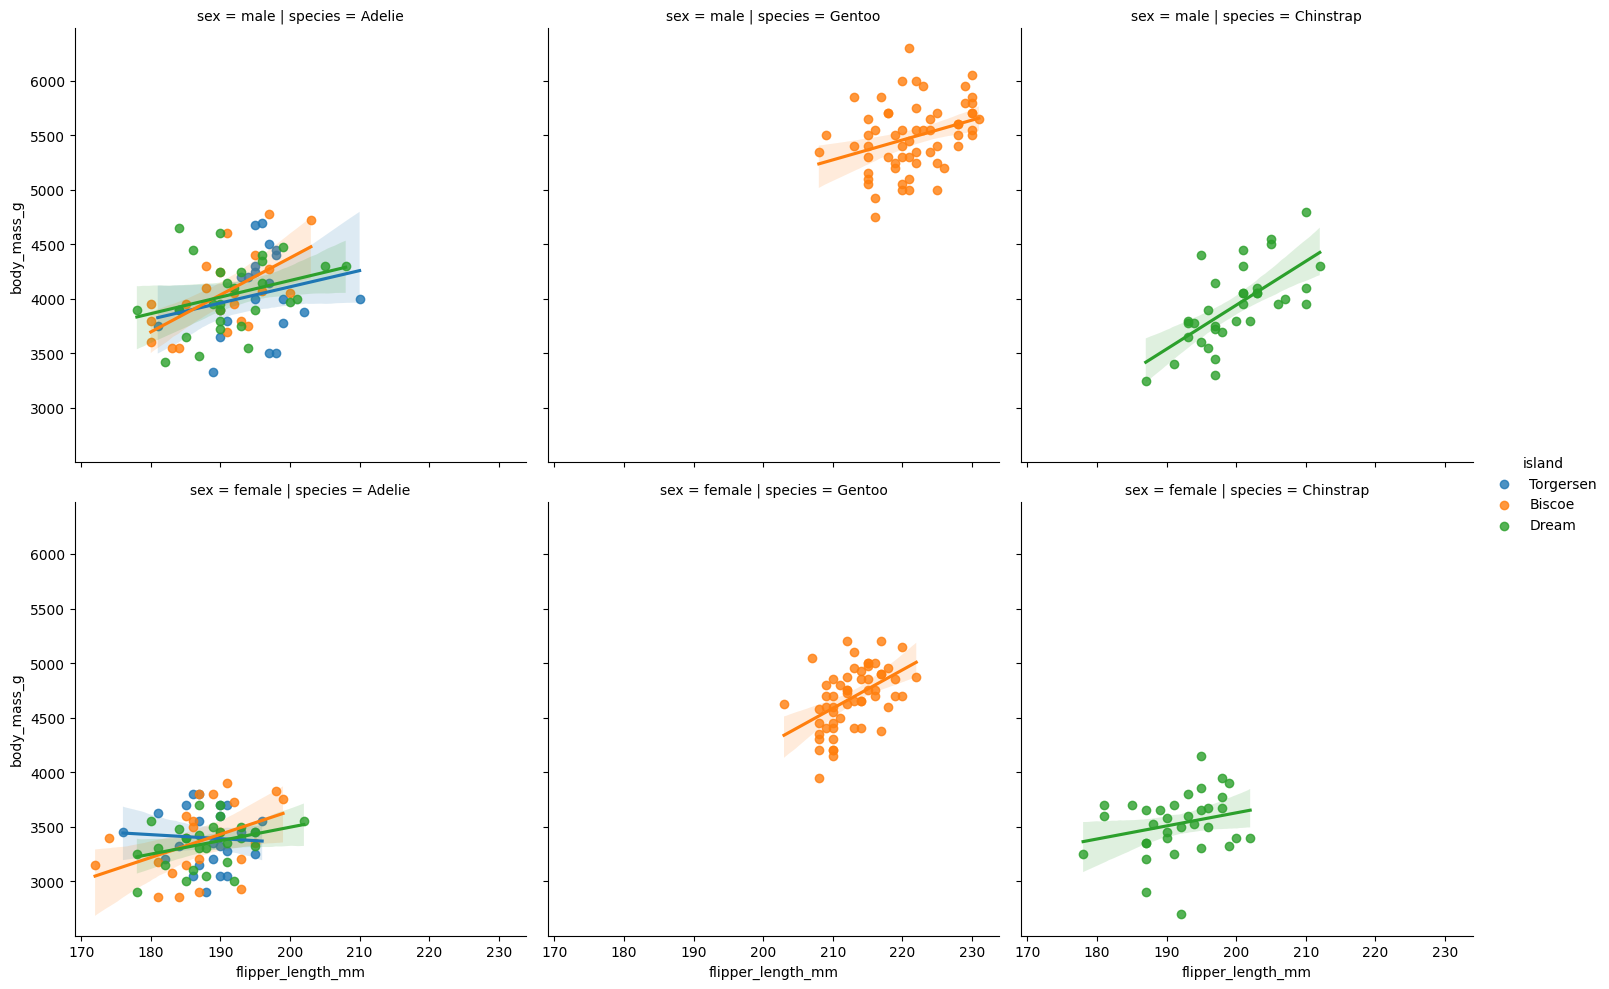

In [23]:
sns.lmplot(x='flipper_length_mm', y='body_mass_g', hue='island', col='species', row='sex', data=filtered_data)

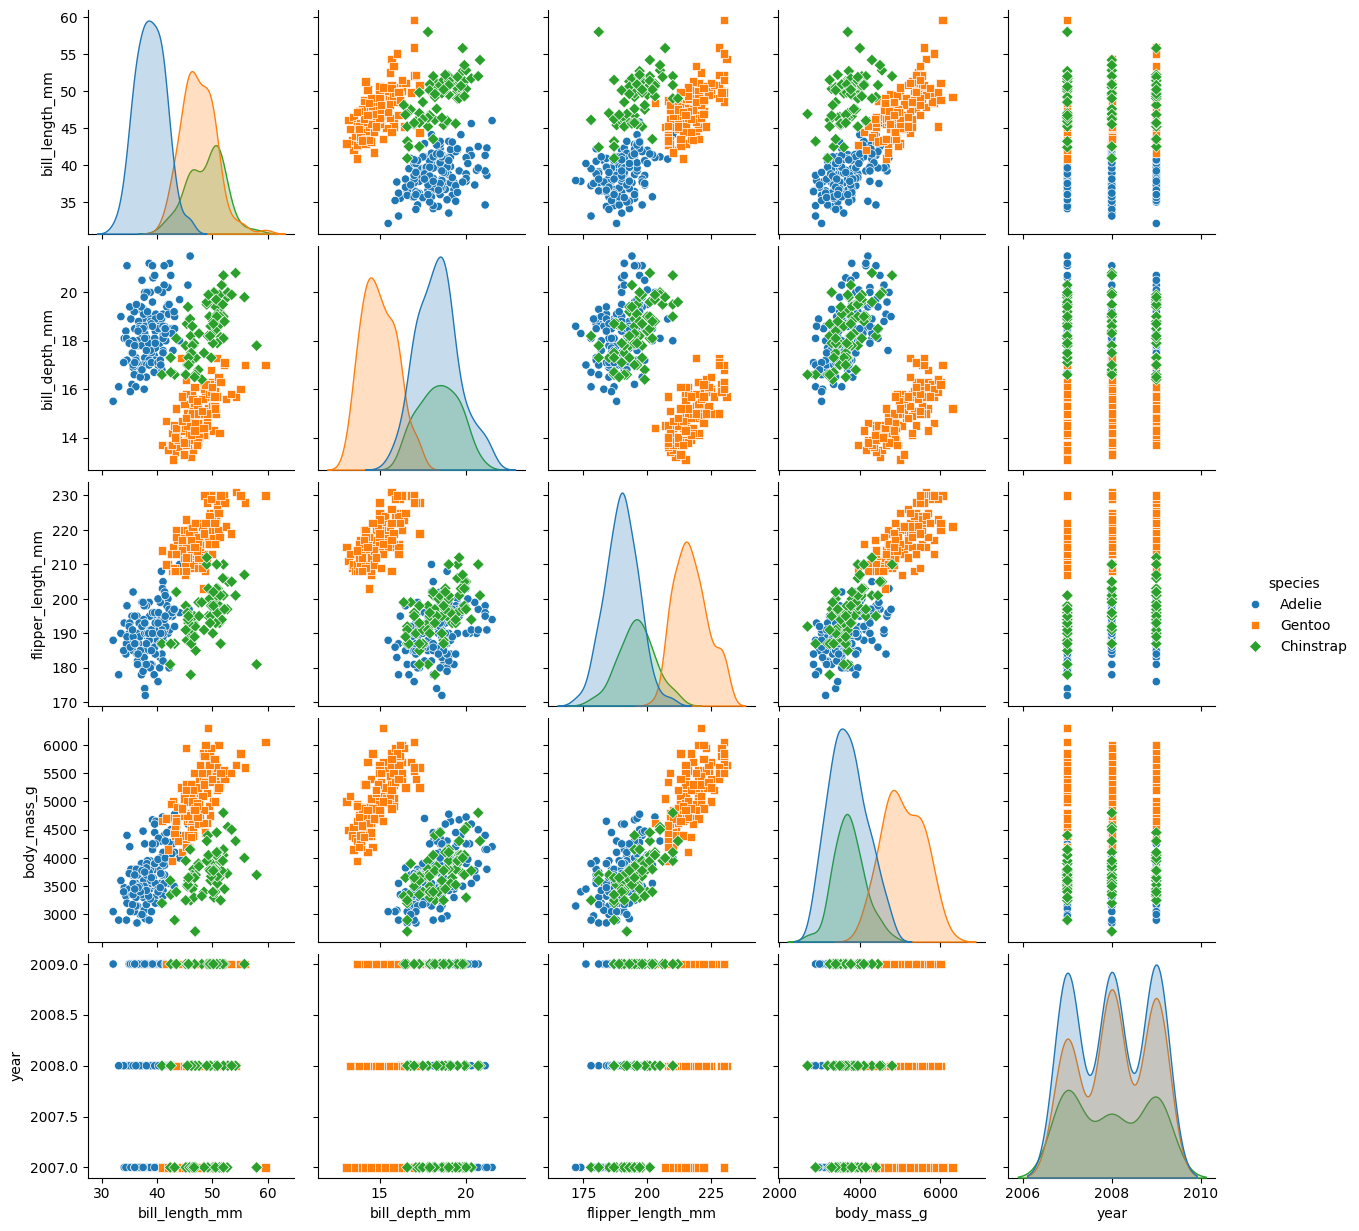

In [24]:
sns.pairplot(penguins, hue='species', markers=["o", "s", "D"])
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Assuming filtered_data_imputed is already created and contains the imputed data

# Separate features and target
x = filtered_data_imputed.drop('species', axis=1)
y = filtered_data_imputed['species']

# Identify categorical and numerical columns
categorical_features = ['island', 'sex', 'year']
numerical_features = x.select_dtypes(include=np.number).columns.tolist()


# Create a column transformer for scaling numerical features and one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Fit and transform the data
x_processed = preprocessor.fit_transform(x)

# Convert the processed data back to a DataFrame (optional, but good for inspection)
# Get feature names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(cat_feature_names)

df_processed = pd.DataFrame(x_processed, columns=all_feature_names)
df_preprocessed = pd.concat([df_processed, y.reset_index(drop=True)], axis=1) # Concatenate with the target variable

display(df_preprocessed.head())

NameError: name 'filtered_data_imputed' is not defined

In [ ]:
x = filtered_data.drop(['species'], axis=1)
y = filtered_data['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming df_preprocessed is already created and contains the preprocessed data

# Separate features and target from the preprocessed data
x_preprocessed = df_preprocessed.drop('species', axis=1)
y_preprocessed = df_preprocessed['species']

# Split the preprocessed data
x_train_processed, x_test_processed, y_train, y_test = train_test_split(x_preprocessed, y_preprocessed, test_size=0.15, random_state=42)

knn = KNeighborsClassifier()
knn_model = knn.fit(x_train_processed, y_train)
y_pred = knn_model.predict(x_test_processed)
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed.drop('species',axis=1),df_preprocessed['species'],test_size=0.50, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
preds_knn = knn.predict(X_test)
print(confusion_matrix(y_test,preds_knn))

In [ ]:
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,preds_knn),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

In [ ]:
and the print(classification_report(y_test,preds_knn))

In [ ]:
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,preds_knn),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

In [ ]:
numerical_df_preprocessed = df_preprocessed.drop('species', axis=1)

sns.heatmap(numerical_df_preprocessed.corr(), annot = True, cmap = 'Blues')